# 1.1 Golden Section Search for the Mode of a Function

## Question 1

Let $f$ be unimodal on $[a, b]$ with a maximum at some point undetermined point in $[a, b]$. Choose the points $x, y$ with $a < x < y < b$, such that

$$ (y − a)/(b − a) = (\sqrt{5} − 1)/2  \qquad (1) $$

and

$$ b - x = y - a  \qquad (2) $$

That is, the interval is divided from each end in *golden section*.

(i) Without loss of generality, suppose that $f(x) \geq f(y)$, ie. we deduce that the mode lies in the subinterval $[a,y] $. This is divided in golden section from $a$ by the point $x$ (at which we already have a function evaluation) as


$$ 
\begin{align}
\frac{x-a}{y-a} & = \frac{(b-a) - (b - x)}{y-a} \\
& =  \frac{b-a}{y-a} - 1 \qquad (\text{using } b - x = y - a) \\
& = \frac{2}{\sqrt{5}-1} - 1\\
& = \frac{\sqrt{5} - 1}{2}
\end{align}
$$


(ii) Simiarly, if  $f(y) \geq f(x)$, we deduce the mode lies in $[x,b]$, which is divided in golden section from $b$ by $y$, ie.

$$ 
\begin{align}
\frac{b-y}{b-x} & = \frac{\sqrt{5} - 1}{2}
\end{align}
$$



### Programming Task

The program to implement the golden search is shown at the end of the notebook, labelled


```golden_search(fval,xlow,xhigh,prec,print_freq = 1)```

This program requires the input of the function *fval*, intervals boundaries *xlow* and *xhigh*, and the required precision *prec*, where the iteraction will be terminated once the mode is guaranteed to lie in an interval of width less than *prec*. 

(i) If $f(x) = f(y)$ the search automatically takes the $[a,y]$ subinterval as the new interval

(ii) It is preferable to use equation (2) to locate the point for the second function evaluation. There are less operations than if we used equation (1), therefore we reduce the computational cost with a high number of iterations. 

(iii) If the mode were at an endpoint of the original interval $[a,b]$, eg. at $b$, the program functions as normal, choosing a succession of subintervals $[a_i,b]$.

In [66]:
xvals = np.linspace(0,1,100)

In [11]:
def fval(xvals):
    return -(xvals-3)**2 + 10

In [63]:
def fval2(xvals):
    return 1 + xvals + xvals**2 - 4*xvals**4

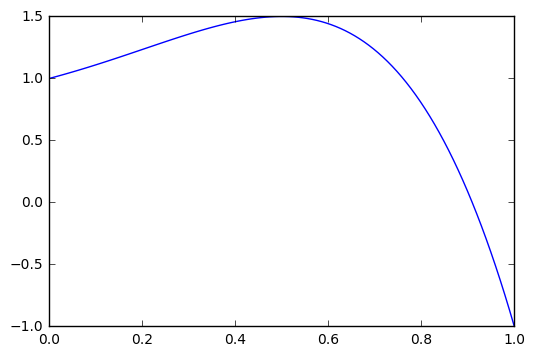

In [67]:
plt.plot(xvals,fval2(xvals))

In [77]:
golden_search(fval2,0,1,prec=0.001)

Mode = 0.5. Accuracy of 0.001 reached upon iteration 15: Mode lies between 0.49963343128205473 and 0.5003665687179453


In [62]:
#plt.plot(xvals,fval(xvals))

### Question 4

The properties of $f$ that determine the numerical accuracy attainable are to do with smoothness. Smooth functions have a first derivative close to zero near the minimum and are therefore flat.

### Question 5

If the mode is located at $ x = x_{0} $, then performing a Taylor expansion about $ x_{0} $, gives

$$  f(x) \approx f(x_{0}) + \frac{(x-x_{0})^{2}}{2!} f''(x_{0}) $$

ie.

$$ \left|   f(x) - f(x_{0})  \right| \approx  \frac{(x-x_{0})^{2}}{2!}   \left| f''(x_{0}) \right|  $$

ie. the error in $f(x_0)$ is approximately proprotional to the squared error in $x_0$

## 5 Application: Optimization of turntable and tone-arm design


The designer of the tone-arm has the following parameters under his control:

- the distance $d$ of the tone-arm pivot $Q$ from the centre $S$ of the record
- the toe-in angle $\theta$ between the tone-arm and the direction of the stylus.




The playing region of a vinyl gramophone record is an annulus of inner radius $r$ and outer
radius $R$. Let $x$ denote the distance $SP$, so that as the stylus moves from the outer edge of the record
to the inner one, $x$ decreases from $R$ to $r$.

### Inner Iteration:

$\phi$ is the angle between QP and the tangent to the groove at P, which by the cosine rule we have 

$$
\begin{align}
d^{2} & = l^{2} + x^{2} - 2 l x \cos(\pi/2 - \phi)  \\
\end{align}
$$

which can be rearranged to give $\phi$ as a function of $x$:

$$ \phi  = \arcsin \left( \frac{l^{2} + x^{2} - d^{2}}{2lx} \right)  $$




We now wish to find $ \Delta \phi = \max \phi(x) - \min \phi(x) $ 

We can do this by using the Golden Search method to find the maximum and minimum values taken by this function in our interval

In [149]:
l = 24
def phi(x,d):

    arg = (l**2 + x**2 - d**2)/(2*l*x)
    return np.arcsin(arg)

#I think that phi(x) is maximum at x = R and minimum at x = r...

def del_phi(d):
    return phi(R,d) - phi(r,d)

In [146]:
phi(r,17.5)

1.5707963267948966

In [114]:
R = 16
r = 6.5

In [122]:
x = np.linspace(r,R,1000)

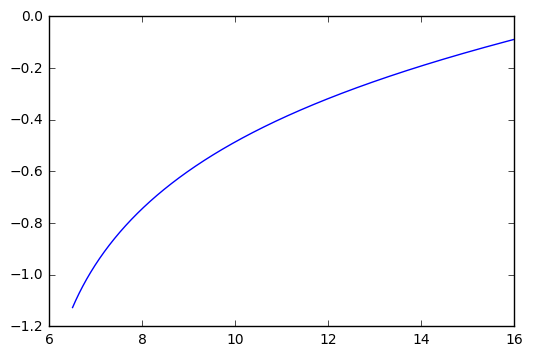

In [130]:
d = 30
plt.plot(x,phi(x,d))

### Outer Iteration:

We now adjust $ d $ to minimize $ \Delta \phi $. 

In choosing $d$ we must have $l - r < d < l + r$ otherwise the stylus would never reach the inner radius $r$

In [152]:
dvals = np.linspace(l - r,l + r, 1000)

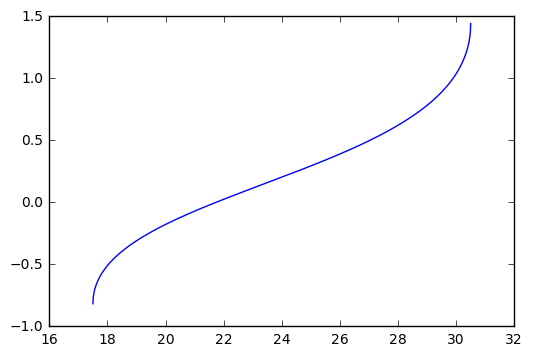

In [153]:
plt.plot(dvals,del_phi(dvals))

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
def golden_search(fval,xlow,xhigh,prec,print_freq = 0):

    phi = (np.sqrt(5) - 1)/2

    y = xlow + phi * (xhigh - xlow)
    x = xhigh - phi * (xhigh - xlow)

    for i in range(100):
        
        if fval(x) >= fval(y):
            xhigh = y
            y = x
            x = xlow + xhigh - y
        elif fval(x) <= fval(y):
            xlow = x
            x = y
            y = xlow + xhigh - x
        if print_freq != 0:
            if i % print_freq == 0:
                print('Iteration {}: Mode lies between {} and {}'.format(i+1,xlow,xhigh))
        if xhigh - xlow < prec:
                print('Mode = {}. Accuracy of {} reached upon iteration {}: Mode lies between {} and {}'.format((xlow + xhigh)/2,prec,i+1,xlow,xhigh))
                break